In [4]:
# Data
import numpy as np
import pandas as pd

# Viz
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Math
import math
import random
from sklearn.decomposition import PCA

In [5]:
# iPCA + graphing
def iPCA(YCSOcsv, SWAPcsv, graph):
    YCSO = pd.read_csv(YCSOcsv)
    SWAP = pd.read_csv(SWAPcsv)
    YCSO = YCSO.dropna()
    SWAP = SWAP.dropna()
    length_YCSO = len(YCSO)
    length_SWAP_col = len(SWAP.columns)
    
    dates = []
    var = []
    
    for n in range(length_YCSO):
        cov_mat = np.zeros((4,4))
        swap_iv = SWAP.iloc[n]
        ycso_ic = YCSO.iloc[n]
        dates.append(swap_iv[0])
        swap_iv = swap_iv.drop(swap_iv.index[0])
        ycso_iv = ycso_ic.drop(ycso_ic.index[0])
        
        for i in range(4):
            cov_mat[i][i]=swap_iv[i]**2
        
        cov_mat[0][1] = 0.5 * (swap_iv[0]**2 + swap_iv[1]**2 - ycso_iv[0]**2)
        cov_mat[1][0] = 0.5 * (swap_iv[0]**2 + swap_iv[1]**2 - ycso_iv[0]**2)
        cov_mat[0][2] = 0.5 * (swap_iv[0]**2 + swap_iv[2]**2 - ycso_iv[1]**2)
        cov_mat[2][0] = 0.5 * (swap_iv[0]**2 + swap_iv[2]**2 - ycso_iv[1]**2)
        cov_mat[0][3] = 0.5 * (swap_iv[0]**2 + swap_iv[3]**2 - ycso_iv[2]**2)
        cov_mat[3][0] = 0.5 * (swap_iv[0]**2 + swap_iv[3]**2 - ycso_iv[2]**2)
        
        cov_mat[1][2] = 0.5 * (swap_iv[1]**2 + swap_iv[2]**2 - ycso_iv[3]**2)
        cov_mat[2][1] = 0.5 * (swap_iv[1]**2 + swap_iv[2]**2 - ycso_iv[3]**2)
        cov_mat[1][3] = 0.5 * (swap_iv[1]**2 + swap_iv[3]**2 - ycso_iv[4]**2)
        cov_mat[3][1] = 0.5 * (swap_iv[1]**2 + swap_iv[3]**2 - ycso_iv[4]**2)
        
        cov_mat[2][3] = 0.5 * (swap_iv[2]**2 + swap_iv[3]**2 - ycso_iv[5]**2)
        cov_mat[3][2] = 0.5 * (swap_iv[2]**2 + swap_iv[3]**2 - ycso_iv[5]**2)
        
        D, P = np.linalg.eigh(cov_mat)
        PC1 = P[:,3] * np.sqrt(D[3])
        PC2 = P[:,2] * np.sqrt(D[2])
        df = pd.DataFrame()
        df["PC1"] = PC1
        df["PC2"] = PC2
        
        if graph == 'beta':
            var.append(PC1[0]/PC1[2])
        else:
            total_var = abs(D[0]) + D[1] + D[2] + D[3]
            var.append(D[3]/total_var)
            
    var = np.array(var)
    dates = np.array(dates)

    return var, dates, df

In [6]:
# iPCA + graphing
def iPCA_date(YCSOcsv, SWAPcsv, graph, index):
    """index is just one time to do it
    """
    YCSO = pd.read_csv(YCSOcsv)
    SWAP = pd.read_csv(SWAPcsv)
    YCSO = YCSO.dropna()
    SWAP = SWAP.dropna()
    length_YCSO = len(YCSO)
    length_SWAP_col = len(SWAP.columns)
    
    dates = []
    var = []
    
    n = index
    cov_mat = np.zeros((4,4))
    swap_iv = SWAP.iloc[n]
    ycso_ic = YCSO.iloc[n]
    dates.append(swap_iv[0])
    swap_iv = swap_iv.drop(swap_iv.index[0])
    ycso_iv = ycso_ic.drop(ycso_ic.index[0])
    
    for i in range(4):
        cov_mat[i][i]=swap_iv[i]**2
    
    cov_mat[0][1] = 0.5 * (swap_iv[0]**2 + swap_iv[1]**2 - ycso_iv[0]**2)
    cov_mat[1][0] = 0.5 * (swap_iv[0]**2 + swap_iv[1]**2 - ycso_iv[0]**2)
    cov_mat[0][2] = 0.5 * (swap_iv[0]**2 + swap_iv[2]**2 - ycso_iv[1]**2)
    cov_mat[2][0] = 0.5 * (swap_iv[0]**2 + swap_iv[2]**2 - ycso_iv[1]**2)
    cov_mat[0][3] = 0.5 * (swap_iv[0]**2 + swap_iv[3]**2 - ycso_iv[2]**2)
    cov_mat[3][0] = 0.5 * (swap_iv[0]**2 + swap_iv[3]**2 - ycso_iv[2]**2)
    
    cov_mat[1][2] = 0.5 * (swap_iv[1]**2 + swap_iv[2]**2 - ycso_iv[3]**2)
    cov_mat[2][1] = 0.5 * (swap_iv[1]**2 + swap_iv[2]**2 - ycso_iv[3]**2)
    cov_mat[1][3] = 0.5 * (swap_iv[1]**2 + swap_iv[3]**2 - ycso_iv[4]**2)
    cov_mat[3][1] = 0.5 * (swap_iv[1]**2 + swap_iv[3]**2 - ycso_iv[4]**2)
    
    cov_mat[2][3] = 0.5 * (swap_iv[2]**2 + swap_iv[3]**2 - ycso_iv[5]**2)
    cov_mat[3][2] = 0.5 * (swap_iv[2]**2 + swap_iv[3]**2 - ycso_iv[5]**2)
    
    D, P = np.linalg.eigh(cov_mat)
    PC1 = P[:,3] * np.sqrt(D[3])
    PC2 = P[:,2] * np.sqrt(D[2])
    df = pd.DataFrame()
    df["PC1"] = PC1
    df["PC2"] = PC2
    
    if graph == 'beta':
        var.append(PC1[0]/PC1[2])
    else:
        total_var = abs(D[0]) + D[1] + D[2] + D[3]
        var.append(D[3]/total_var)
            
    var = np.array(var)
    dates = np.array(dates)

    return var, dates, df

"The first column reflects the impact of a 1-sigma move in the level factor on rates in different tenors; the second column reflects the impact of a 1-sigma move in the second (or curve) factor, and so on." 

In [135]:
def cleanData(swap_data: pd.DataFrame, verbose=False, log_transform=False):

    # Impute missing values
    from sklearn.impute import SimpleImputer
    if (swap_data.isna().any().any()): # df -> series -> single value 
        print("Missing data found. Imputing.")
    
    # Dropping Values
    dates = swap_data["Date"].copy()
    swap_data = swap_data.drop("Date", axis=1)

    # Imputation
    imp = SimpleImputer(missing_values=np.nan, strategy='mean') # this could be tuned 
    imp = pd.DataFrame(imp.fit_transform(swap_data))
    
    # Print
    if verbose:
        print(imp.head())
    
    if log_transform:
        for column in imp.columns:
            print(imp[column])
            imp[column] = np.log10(imp[column])

    # print(imp.isna().any())
    return dates, imp


def regularPCA(swap_data, dates, window_size, viz=False):
    """
    Returns DF with dates / PC1 variance, over window_size. 
    """
    
    index = 0
    explainedvar = []
    datesvar = []
    
    while index + window_size < len(swap_data):
        rolling_window = (swap_data.iloc[(index):(index+window_size), :])
        # print(rolling_window)
        pca = PCA(n_components=3)
        pca = pca.fit(rolling_window)
        explainedvar.append(pca.explained_variance_ratio_[0])
        datesvar.append(dates[index+window_size])

        if viz:
            print(pca.explained_variance_ratio_)
            sns.boxplot(y = pca.components_[0], x = swap_data.columns).set_title('PC1')
        index += 1
    
    df = pd.DataFrame()
    df["Date"] = datesvar
    df["Hist PCA"] = explainedvar

    return df


In [136]:
# Identifying Sig PC1 % Variance Changes

import statistics

def find_regime_shifts(pc1: list[float], dates: list[str], sigma: float, window_size: int = 20, offset: int = 10):
    i = window_size
    iarr = []
    while i <= len(pc1)-10: 
        paststd = sigma * statistics.stdev(pc1[i-window_size:i])
        if max(pc1[i:i+offset]) - min(pc1[i+offset:i+2*offset]) > paststd:
            iarr.append(i)
            print(f"{dates[i]} \t {pc1[i]} // {paststd} \t {max(pc1[i:i+offset])} \t {min(pc1[i:i+offset])}")
            i += (window_size)
        i += 1
    return iarr

In [137]:
# Get Data
libor_data = pd.read_csv("data/swap_rates/libor.csv")
dates, libordf = cleanData(libor_data, False)
libordf.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.74985,1.72229,1.70304,1.70542,1.72573,1.75381,1.77980,1.86699,1.94232,2.06234,...,2.44382,2.46957,2.51508,2.56102,2.60406,2.61504,2.61228,2.59353,2.56103,2.54854
1,1.74766,1.72350,1.69919,1.70300,1.72563,1.75462,1.78290,1.87303,1.95000,2.07287,...,2.50327,2.53227,2.57947,2.62716,2.67141,2.68317,2.68054,2.66180,2.62930,2.61680
2,1.71703,1.71334,1.70023,1.71000,1.73377,1.76111,1.78948,1.87966,1.95816,2.08044,...,2.50278,2.53016,2.57765,2.62470,2.66924,2.68065,2.67707,2.65770,2.62457,2.61332
3,1.65422,1.71225,1.70698,1.71953,1.74729,1.77712,1.80426,1.89086,1.96462,2.08230,...,2.49243,2.52030,2.56510,2.60926,2.65100,2.66087,2.65543,2.63668,2.60294,2.59168
4,1.66600,1.68163,1.69836,1.72155,1.75141,1.78352,1.81281,1.90580,1.98397,2.10817,...,2.51713,2.54200,2.58200,2.62112,2.65775,2.66438,2.65725,2.63787,2.60476,2.59351


In [138]:
# Get Data
libor_data = pd.read_csv("data/swap_rates/libor.csv")
dates, libordf = cleanData(libor_data, False)
libordf.drop(libordf.columns.difference([10,13,18,23]), 1, inplace=True)

# Run Methods
window = 5
df = regularPCA(libordf, dates, window, False)
var, dates, _ = iPCA('data/swaptions/YCSO_6M.csv','data/swaptions/SWAP_6M.csv','notbeta')
df["iPCA"] = var[window:]

fig = px.line(df, x='Date', y= df.columns[1:], title=f"% Variance Explained by PC1: iPCA vs {window}-day historical PCA")
# fig.add_vline(x=345)
fig.show()


# plt.plot(df["Date"], df["iPCA"])
# plt.show()


/var/folders/ml/jym8w_cn7xx_bm9bhlk4cq400000gn/T/ipykernel_24449/1628718727.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [139]:
# Regime Shifts (iPCA)
find_regime_shifts(var, dates, 3, 20, 3)
datelist = list(dates)
datelist.index("28-May-19")

df["iPCA"].iloc[351]

20-Apr-18 	 0.930667386079565 // 0.005466404078067449 	 0.9317294428600554 	 0.930667386079565
06-Aug-18 	 0.939102723691156 // 0.004178166316696057 	 0.9425904741634307 	 0.939102723691156
13-Nov-18 	 0.9520377904876569 // 0.006487781212290407 	 0.9608877451616665 	 0.9497428926221355
14-Dec-18 	 0.9472563866968907 // 0.009332666343379724 	 0.9472563866968907 	 0.9445505161784203
18-Mar-19 	 0.9434704211005281 // 0.005576395661072792 	 0.9434704211005281 	 0.941815788767938
28-May-19 	 0.9443670310445214 // 0.0055149244659422406 	 0.9478999143392954 	 0.9437376709875591
07-Aug-19 	 0.9233241482464649 // 0.010914550696252684 	 0.9235871123310745 	 0.9230195960326855
05-Dec-19 	 0.9461115918407127 // 0.003429352707096562 	 0.9493702369185 	 0.9461115918407127
20-Feb-20 	 0.9530108320733518 // 0.011468468207631484 	 0.9554224373406076 	 0.9529735978034879
01-May-20 	 0.9000460869652366 // 0.021077499990710256 	 0.9030325033562676 	 0.8970176421326032
29-Sep-20 	 0.9351072517169334 // 0.0

0.9062617594102694

In [164]:
# Graphing Lines

# Strict Parameter Set

fig = px.line(df, x='Date', y= 'iPCA', title=f"% Variance Explained by PC1: iPCA vs {window}-day historical PCA")
iarr = find_regime_shifts(var, dates, 10, 20, 9)
for i in iarr:
    fig.add_vline(x=(i), line_width=2)
    fig.add_vrect(x0 = (i), x1 = (i+10), fillcolor="green", opacity=0.25, line_width=0)
# fig.add_vline(x=345)
fig.show()

# Loose Parameter Set 

07-Dec-18 	 0.9492241453504835 // 0.027004232675953768 	 0.9509403142951693 	 0.9445505161784203
13-May-19 	 0.9387233389335518 // 0.017132288981335977 	 0.9422523961224553 	 0.9387233389335518
09-Dec-19 	 0.9493702369185 // 0.009971146594860565 	 0.9493702369185 	 0.9413114177216054
05-Feb-20 	 0.9516905703847176 // 0.017527299774289132 	 0.9597095367671794 	 0.9516905703847176
23-Apr-20 	 0.9059456429676072 // 0.07811244174826762 	 0.9098131638714272 	 0.8824936826493042
25-May-21 	 0.9028377286283359 // 0.023004053902225197 	 0.911347256609575 	 0.9028377286283359
21-Sep-21 	 0.8981444284077178 // 0.01166741214112342 	 0.8999471595157688 	 0.8933481945181364
07-Oct-22 	 0.8802849477455049 // 0.016261750727622357 	 0.8807582757860037 	 0.873922032198693


**Note**: Log transforming the data doesn't work. Data windows don't matter.

# Other Assorted Methods

In the Medium post, we saw that PC1 represented the fundamental drivers of swap rates (as seen by the shape of PC1) and exhibit higher levels of sensitivity, which "is typical for a market with an active central bank directly influencing short-end rates." The author also writes that "the second principal component, generally representing the slope of the curve that is not explained by the first factor (directional movements), which reveals and quantifies the shape of flattening moves, pivoting around the 10yr level which is an important point of liquidity in the market."

In [10]:
# iPCA PC1 / PC2 plotting
# We wish to show that PC1 changes a lot between regime shifts but PC2 remains relatively constant in general. 
# We also show the directional changes in PC2. 

labels = ['Dec 2019', 'Apr 2020',  'Dec 2020', 'Apr 2021', 'Sept 2021', 'Dec 2021', 'Mar/Apr 2022']
x_labels = ["2Y", "5Y", "10Y", "30Y"]

# Dec 2019
var, dates, pcs1 = iPCA_date('data/swaptions/YCSO_6M.csv','data/swaptions/SWAP_6M.csv','notbeta', 485)
print(pcs1.head())

# Apr 2020
var, dates, pcs2 = iPCA_date('data/swaptions/YCSO_6M.csv','data/swaptions/SWAP_6M.csv','notbeta', 555)
print(pcs2.head())

# Dec 2020
var, dates, pcs3 = iPCA_date('data/swaptions/YCSO_6M.csv','data/swaptions/SWAP_6M.csv','notbeta', 715)
print(pcs3.head())

# Apr 2021
var, dates, pcs4 = iPCA_date('data/swaptions/YCSO_6M.csv','data/swaptions/SWAP_6M.csv','notbeta', 815)
print(pcs4.head())

# Sept 2021
var, dates, pcs5 = iPCA_date('data/swaptions/YCSO_6M.csv','data/swaptions/SWAP_6M.csv','notbeta', 880)
print(pcs5.head())

# Dec 2021
var, dates, pcs6 = iPCA_date('data/swaptions/YCSO_6M.csv','data/swaptions/SWAP_6M.csv','notbeta', 930)
print(pcs6.head())

# Mar 2022
var, dates, pcs7 = iPCA_date('data/swaptions/YCSO_6M.csv','data/swaptions/SWAP_6M.csv','notbeta', 1065)
print(pcs7.head())


        PC1       PC2
0 -3.020006 -1.225740
1 -3.846128 -0.461160
2 -4.005297  0.426021
3 -3.724468  1.011979
        PC1       PC2
0 -1.997768  1.367672
1 -3.880950  1.597366
2 -5.270779 -0.017246
3 -5.472047 -1.615609
        PC1       PC2
0 -0.754344  0.687599
1 -2.107584  0.721681
2 -3.504919  0.379165
3 -4.072668 -0.827131
        PC1       PC2
0 -1.400279  1.345279
1 -4.136807  1.560015
2 -5.018071 -0.080020
3 -4.626587 -1.715238
        PC1       PC2
0 -1.870532  1.668314
1 -3.843577  1.240936
2 -4.426142 -0.341928
3 -4.284159 -1.488471
        PC1       PC2
0 -2.211013 -1.775653
1 -4.048829 -1.003404
2 -4.564862  0.476779
3 -4.256848  1.365370
        PC1       PC2
0 -6.538325 -3.586376
1 -7.273270 -0.359549
2 -6.629584  1.664661
3 -5.626339  2.671004


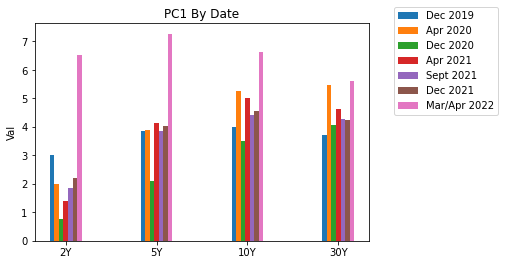

In [11]:
# PC1 Values (iPCA)

pc = "PC1"
x = np.arange(len(x_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3* width/7, pcs1[pc] * -1, width/7, label=labels[0])
rects2 = ax.bar(x - 2 * width/7, pcs2[pc] * -1, width/7, label=labels[1])
rects3 = ax.bar(x - 1 * width/7, pcs3[pc] * -1, width/7, label=labels[2])
rects4 = ax.bar(x, pcs4[pc] * -1, width/7, label=labels[3])
rects5 = ax.bar(x + width/7, pcs5[pc] * -1, width/7, label=labels[4])
rects6 = ax.bar(x + 2 * width/7, pcs6[pc] * -1, width/7, label=labels[5])
rects7 = ax.bar(x + 3 * width/7, pcs7[pc] * -1, width/7, label=labels[6])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Val')
ax.set_title(f'{pc} By Date')
ax.legend(bbox_to_anchor=(1.4, 1.1))
ax.set_xticks(x)
ax.set_xticklabels(x_labels)

plt.show()

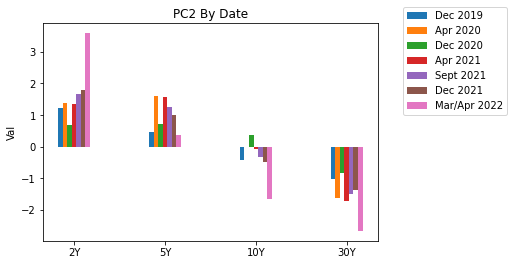

In [12]:
# PC2 Values (iPCA)

pc = "PC2"
x = np.arange(len(x_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3* width/7, pcs1[pc] * -1, width/7, label=labels[0])
rects2 = ax.bar(x - 2 * width/7, pcs2[pc], width/7, label=labels[1])
rects3 = ax.bar(x - 1 * width/7, pcs3[pc], width/7, label=labels[2])
rects4 = ax.bar(x, pcs4[pc], width/7, label=labels[3])
rects5 = ax.bar(x + width/7, pcs5[pc], width/7, label=labels[4])
rects6 = ax.bar(x + 2 * width/7, pcs6[pc] * -1, width/7, label=labels[5])
rects7 = ax.bar(x + 3 * width/7, pcs7[pc] * -1, width/7, label=labels[6])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Val')
ax.set_title(f'{pc} By Date')
ax.legend(bbox_to_anchor=(1.4, 1.1))
ax.set_xticks(x)
ax.set_xticklabels(x_labels)

plt.show()

In [13]:
def reconstruct(df, colorin, window: int = 90, n_components: int = 4, n_components_recreated: int = 2, start_index: int = 500):
    index = len(libordf) - 1
    winlist = [1, 30, 60, 90, 120, 150, 180, 270, 360, 540, 720]
    if window not in winlist:
        print("Use a window size in winlist.")
        return
    
    windex = winlist.index(window)
    while index - start_index >= 0:
        rolling_window = libordf.iloc[(index-window):(index+1), :]
        pca = PCA(n_components=n_components)
        pca = pca.fit(libordf.iloc[(index-window):(index+1), :])

        # scores = (rolling_window @ pca.components_[0])
        # print(pca.explained_variance_ratio_)
        # print(np.mean(rolling_window.iloc[:, windex]))

        if n_components_recreated > 1:
            reconstruction = rolling_window @ ((pca.components_[0:n_components_recreated]).T @ pca.components_[0:n_components_recreated])
        else:
            reconstruction = rolling_window @ (np.outer(pca.components_[0], pca.components_[0].reshape(-1, 1))) 

        # Do it forward
        plt.plot(reconstruction.iloc[:, windex], color=colorin)
        plt.plot(rolling_window.iloc[:, windex], color="orange")
        plt.title("Swap Rates Reconstructed w/ PC1 (Blue) vs Real (Orange)")
        index-=1
        break


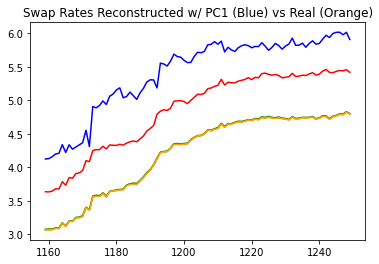

In [18]:
# Data Reconstruction (PC1)
libor_data = pd.read_csv("data/libor.csv")
dates, libordf = cleanData(libor_data, False)

reconstruct(libor_data, "blue", 90, 2, 1)
reconstruct(libor_data, "red", 90, 4, 4)
reconstruct(libor_data, "green", 90, 9, 9)

In [2]:
# Beta Calculations

import pandas as pd
beta_data = pd.read_csv("data/Beta_data.csv")

# Oct 2021 - Dec 2022

print("2 Years: ", beta_data["Libor 2 Years Mid Rate"].iloc[934:995].mean())
print("10 Years: ", beta_data["Libor 10 Years Mid Rate"].iloc[934:995].mean())
print("Ratio: ", (beta_data["Libor 2 Years Mid Rate"].iloc[934:995].mean()/beta_data["Libor 10 Years Mid Rate"].iloc[934:995].mean()))

# Jan 2022 - Mar 2022

print("2 Years: ", beta_data["Libor 2 Years Mid Rate"].iloc[996:1055].mean())
print("10 Years: ", beta_data["Libor 10 Years Mid Rate"].iloc[996:1055].mean())
print("Ratio: ", (beta_data["Libor 2 Years Mid Rate"].iloc[996:1055].mean()/beta_data["Libor 10 Years Mid Rate"].iloc[996:1066].mean()))

# Mar 2022 - June 2022

print("2 Years: ", beta_data["Libor 2 Years Mid Rate"].iloc[1058:1119].mean())
print("10 Years: ", beta_data["Libor 10 Years Mid Rate"].iloc[1058:1119].mean())
print("Ratio: ", (beta_data["Libor 2 Years Mid Rate"].iloc[1058:1119].mean()/beta_data["Libor 10 Years Mid Rate"].iloc[1058:1119].mean()))


2 Years:  0.7197316666666664
10 Years:  1.5738593333333335
Ratio:  0.4573036810998355
2 Years:  1.60871406779661
10 Years:  2.006079830508474
Ratio:  0.7667327460819429
2 Years:  3.0265440983606555
10 Years:  2.9971313114754086
Ratio:  1.0098136463933467
